# Insurance claim fraud detection



In [1]:
# import libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading csv file

In [5]:
data=pd.read_csv(r"C:\Users\vigne\OneDrive\Desktop\sathish workbench\lesa\lesa project\insurance_claims.csv")

In [6]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [8]:
data.shape

(1000, 40)

In [9]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [10]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [12]:
data.duplicated().sum()

0

In [13]:
## we can see the missing value as denoted as '?' so, let replace with 'na'

In [14]:
data.replace('?', np.nan, inplace=True)

In [15]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [16]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [18]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# EDA Explanatory Data Analysis

## 1.Visualize missing values

In [19]:
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [20]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [21]:
import missingno as msno

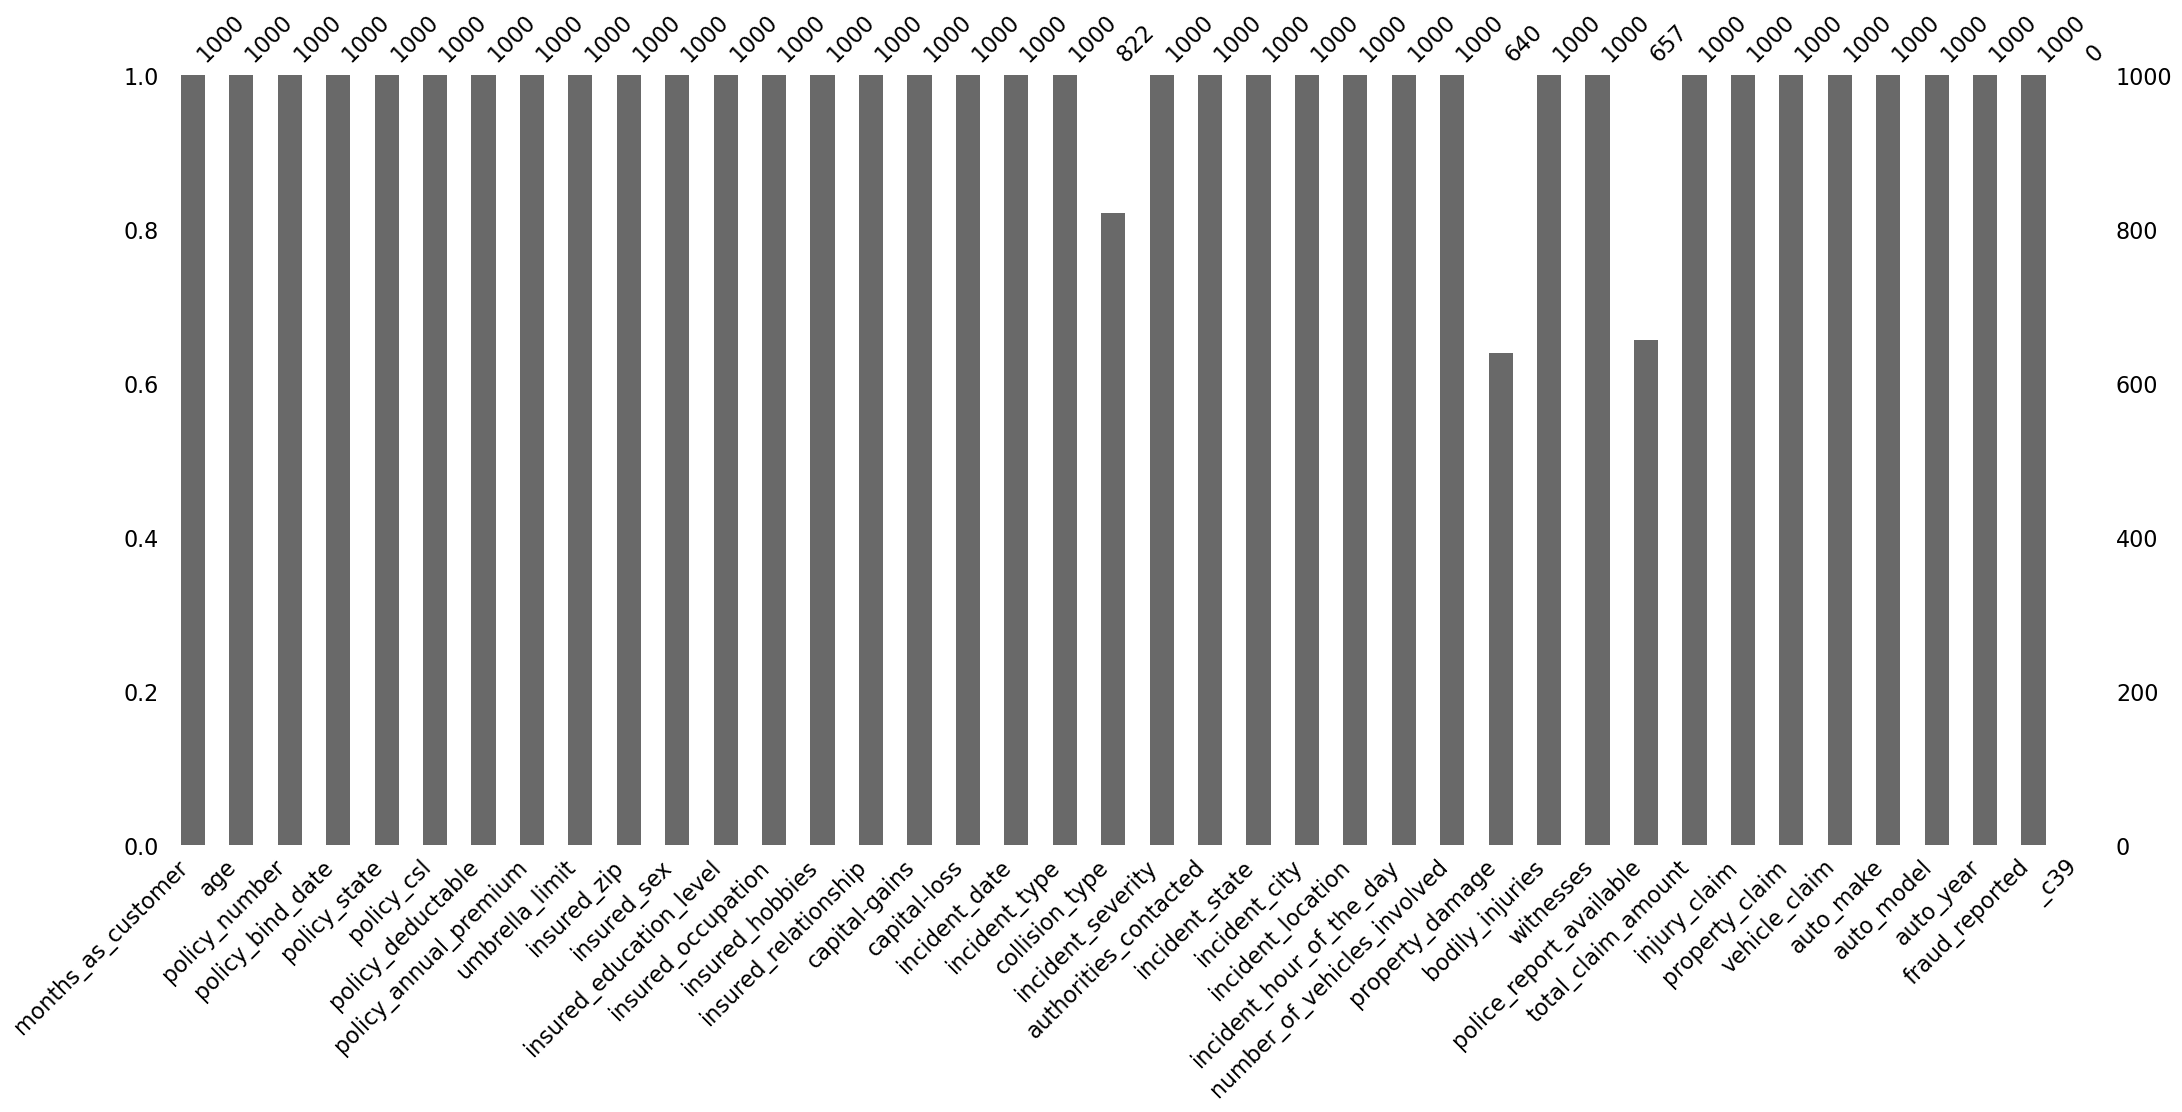

In [22]:
msno.bar(data)
plt.show()

# Handling missing values

In [23]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [24]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [25]:
data['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [26]:
data['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [27]:
# Missing value filled with mode

In [33]:
data['collision_type']=data['collision_type'].fillna(data['collision_type'].mode()[0])

In [34]:
data['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [35]:
data['property_damage']=data['property_damage'].fillna(data['property_damage'].mode()[0])

In [36]:
data['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [37]:
data['police_report_available']=data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [38]:
data['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

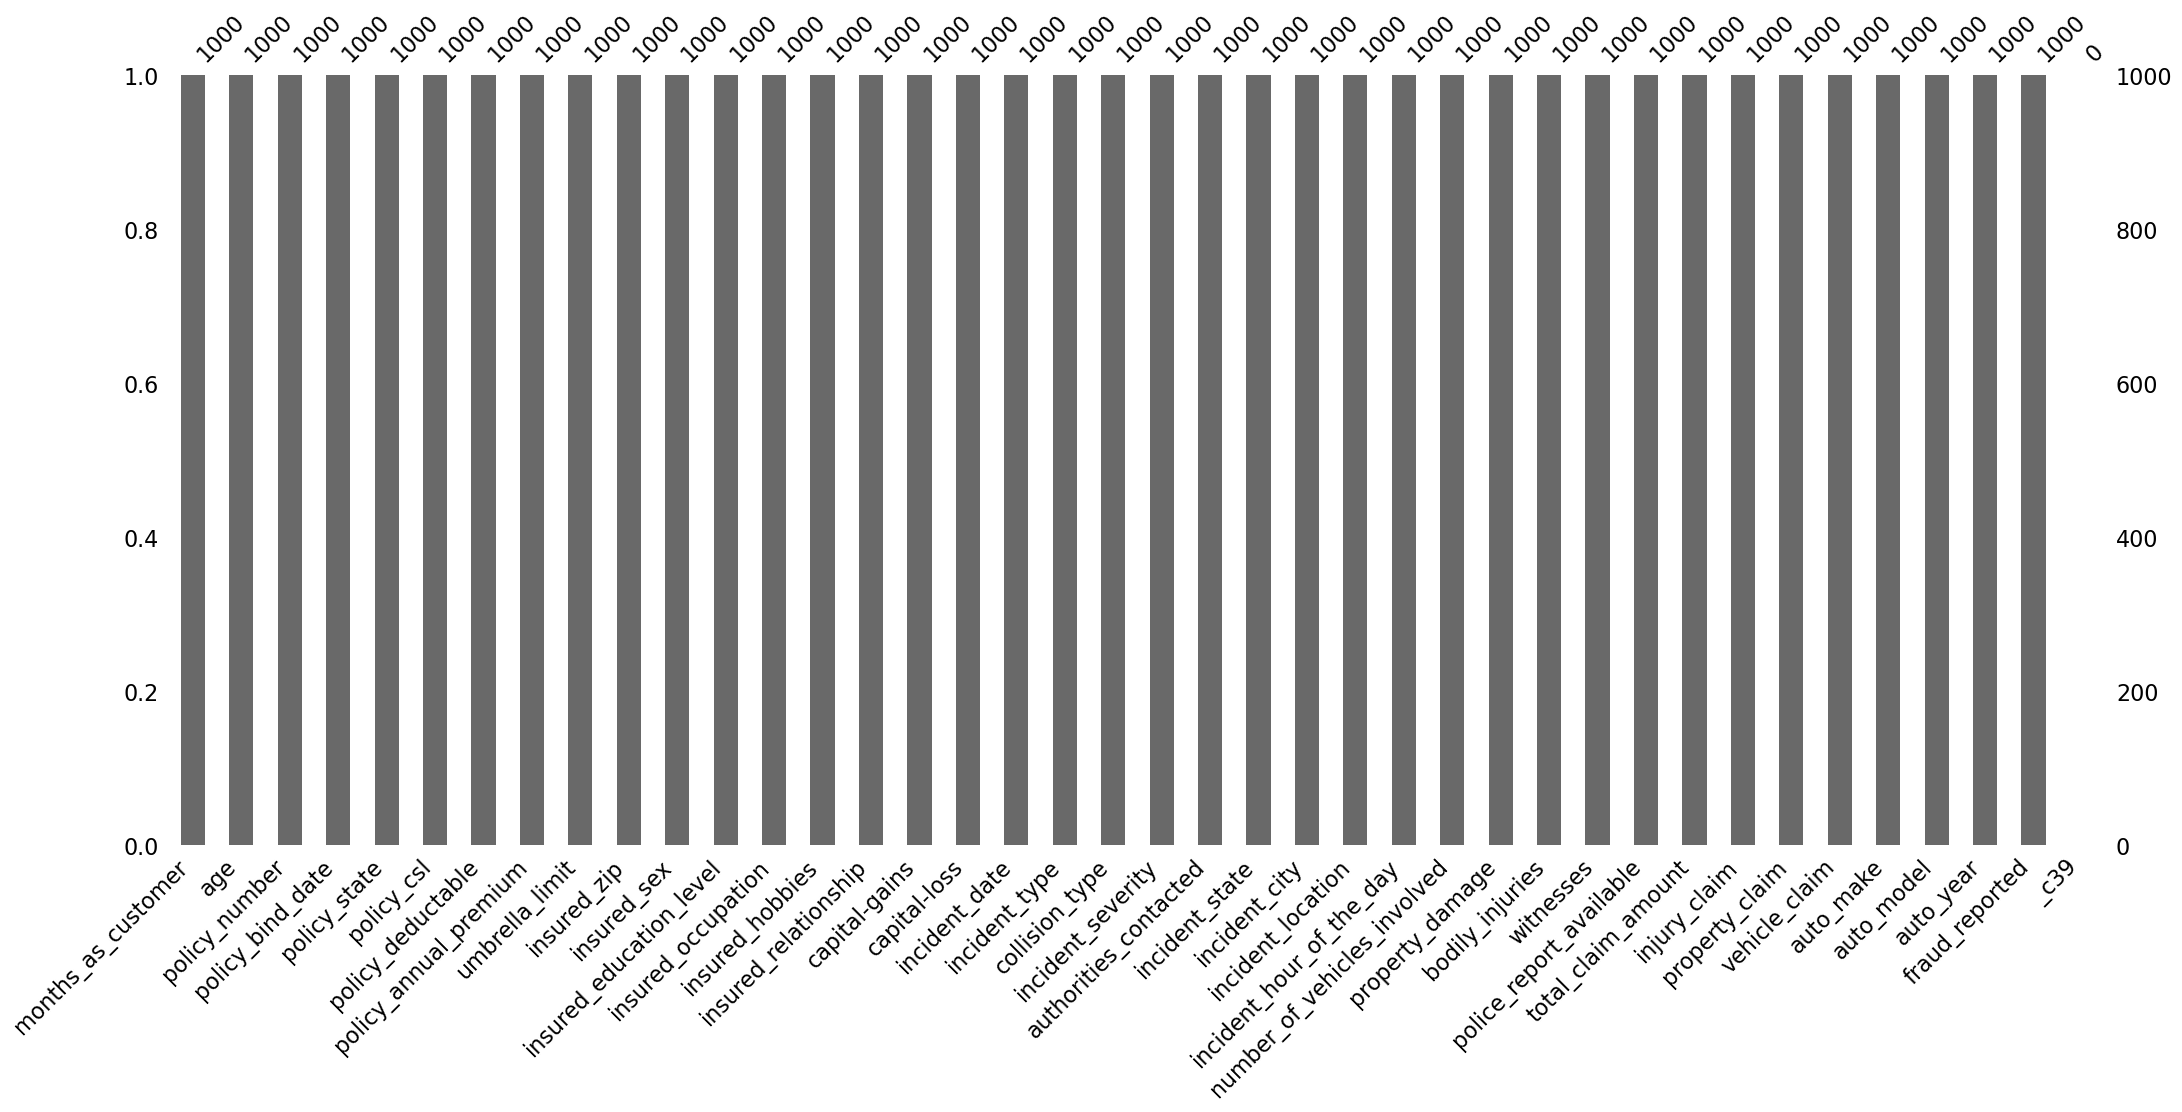

In [39]:
# missing plot

msno.bar(data)
plt.show()

## 2. Checking correlation and multicollinearity

In [41]:
# Heat map

In [49]:
corr=round(data.corr(),1)

In [50]:
corr

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.0,0.9,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,-0.0,0.1,0.1,0.1,0.0,0.1,-0.0,NaN
age,0.9,1.0,0.1,0.0,0.0,0.0,0.0,-0.0,0.0,0.1,0.0,-0.0,0.1,0.1,0.1,0.1,0.1,0.0,NaN
policy_number,0.1,0.1,1.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,NaN
policy_deductable,0.0,0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.1,0.1,-0.0,0.1,0.0,0.0,0.1,0.0,0.0,NaN
policy_annual_premium,0.0,0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,NaN
umbrella_limit,0.0,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,NaN
insured_zip,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,NaN
capital-gains,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,0.1,0.1,-0.0,0.0,0.0,-0.0,0.0,0.0,NaN
capital-loss,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1,NaN
incident_hour_of_the_day,0.1,0.1,0.0,0.1,-0.0,-0.0,0.0,-0.0,-0.0,1.0,0.1,-0.0,0.0,0.2,0.2,0.2,0.2,0.0,NaN


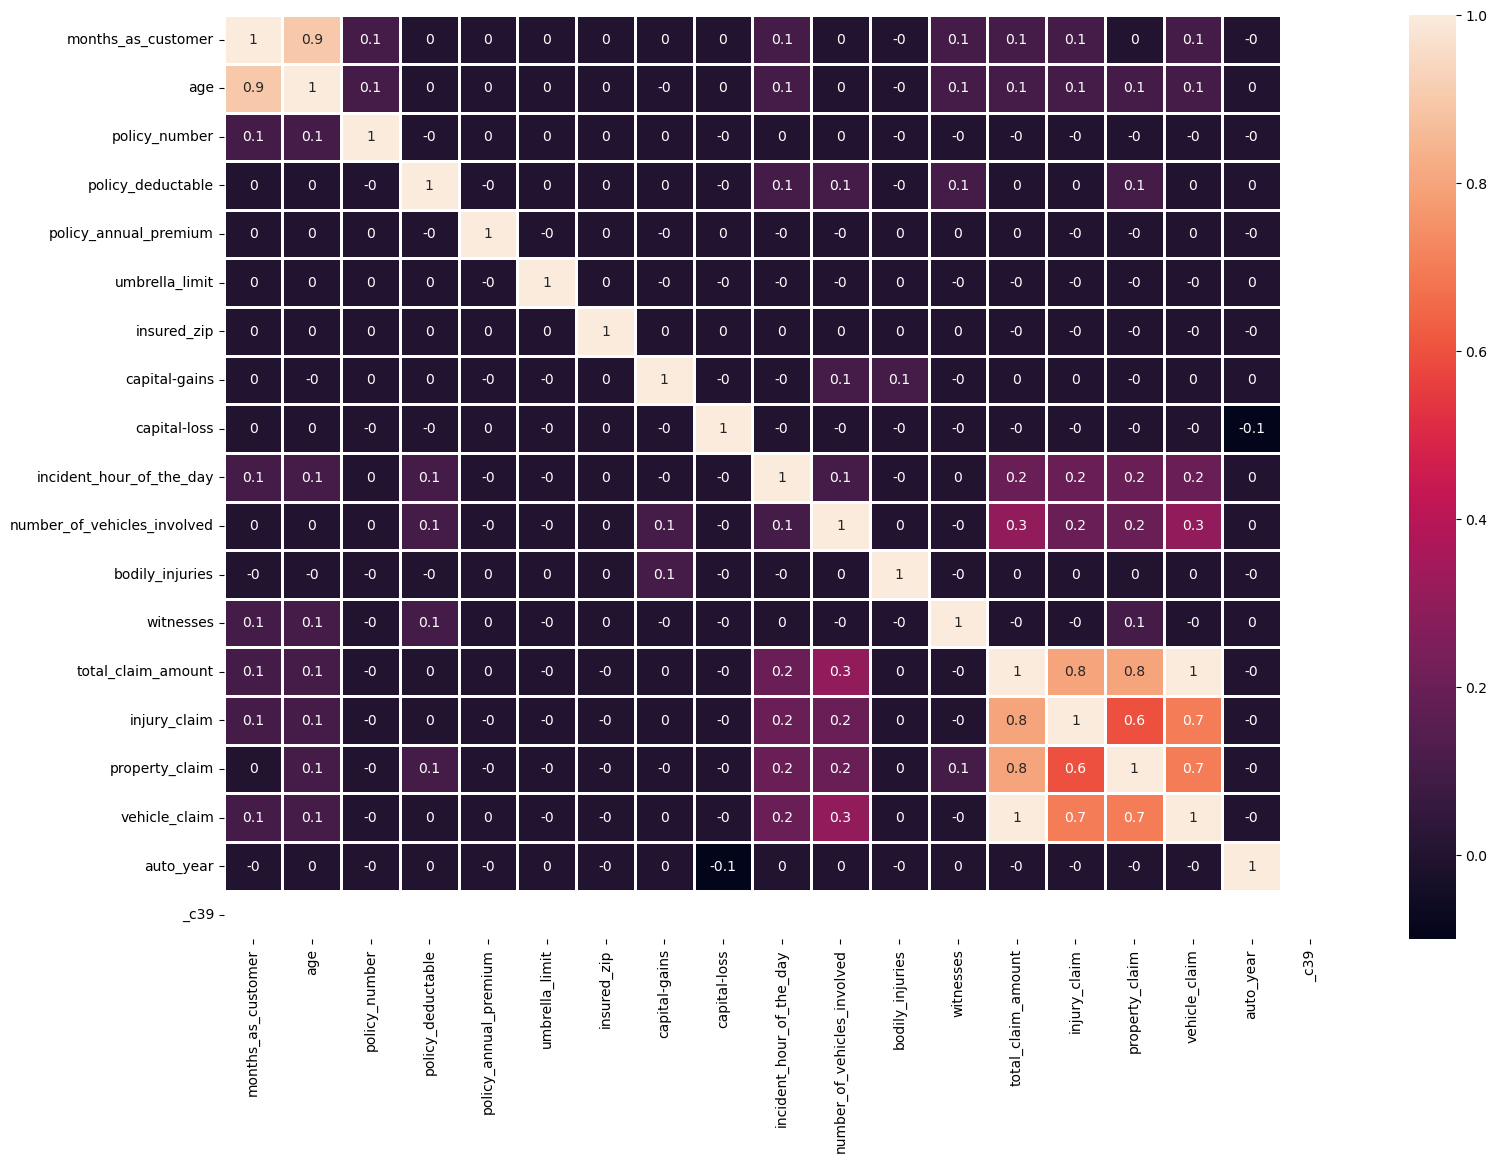

In [53]:
plt.figure(figsize=(18,12))
sns.heatmap(data=corr, annot=True, linewidth=1)
plt.show()

In [54]:
# Multicollinearity

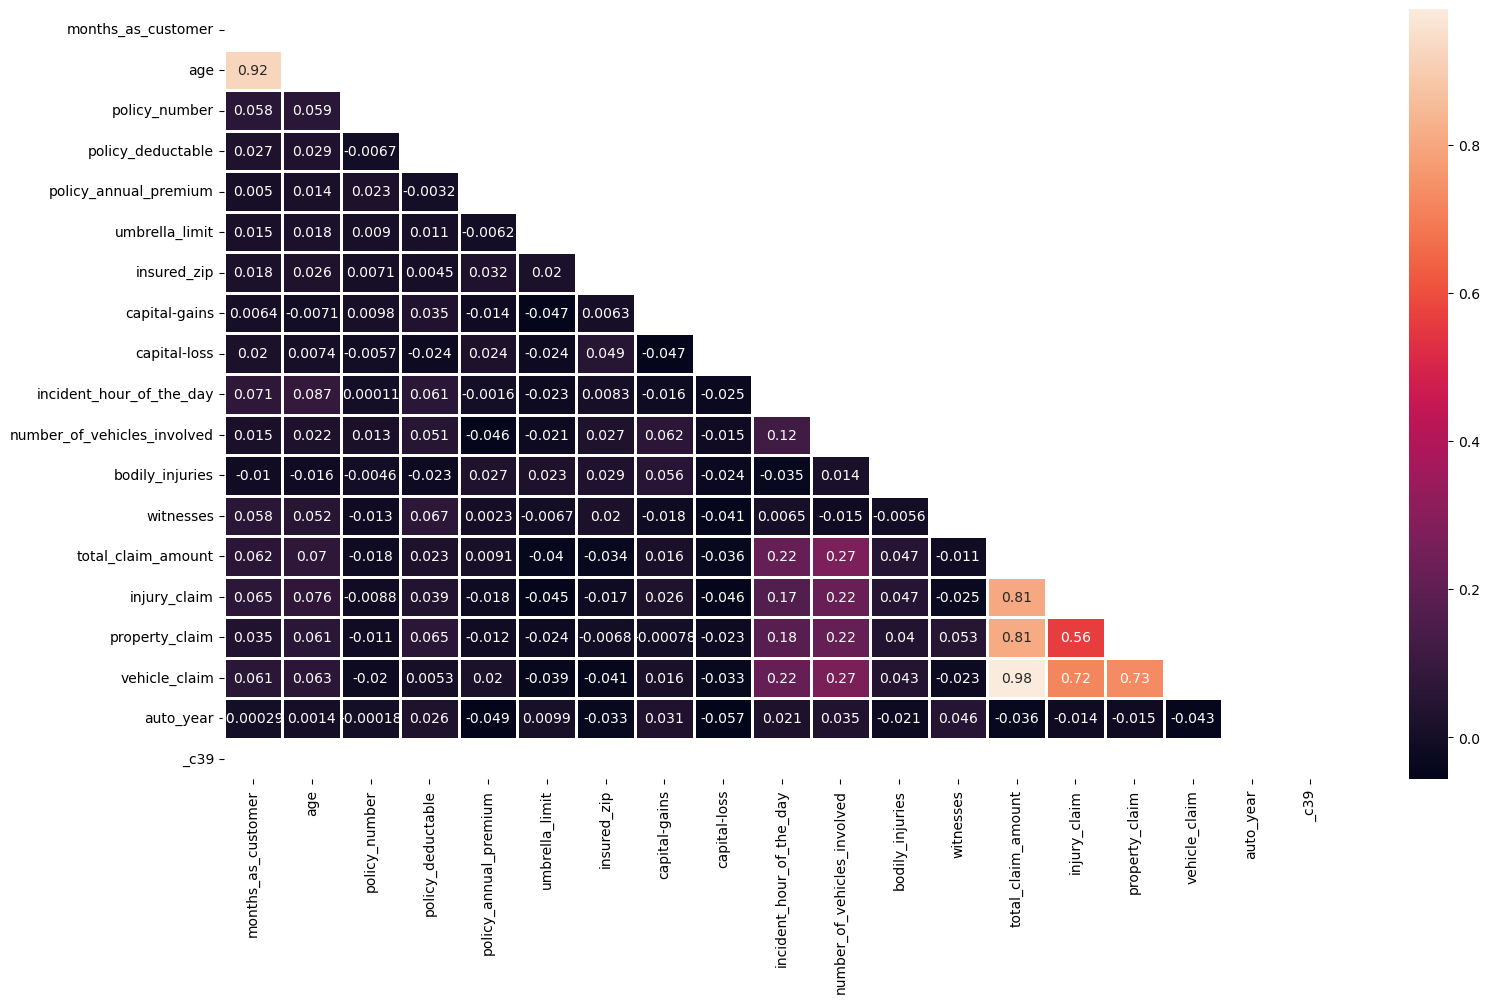

In [63]:
plt.figure(figsize=(18,10))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data=corr,mask=mask, annot=True, linewidth=1)
plt.show()

From the above plot we can see that the Age and months_as_customer columns
are high correlated. so that we will drop age column from this data.  And also there is high correlation between total_claim_amount
injury_claim, property_claim, vehicle claim.  But we know the the sum of all claim as come under total_claim_amount. 
So that I can drop total_claim_amount in this dataset.

In [66]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [67]:
data.drop(columns=['age','total_claim_amount'], inplace=True, axis=1)

In [69]:
data.columns

Index(['months_as_customer', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_number                1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [71]:
data.nunique()

months_as_customer              391
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

# Lets check data is balanced or not

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

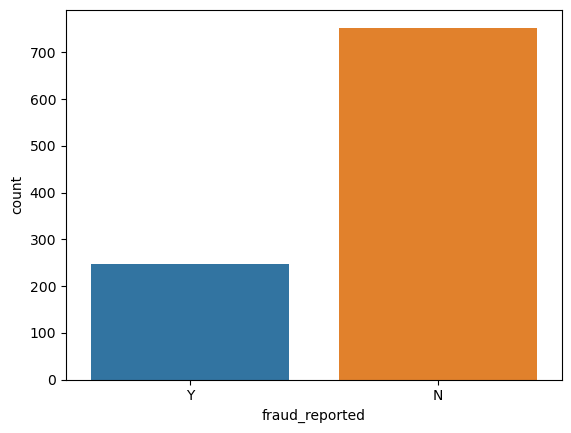

In [73]:
sns.countplot(x='fraud_reported', data=data)

In [74]:
## calculate the percentage of fraud

In [76]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [77]:
data['fraud_reported'].value_counts()[0]

753

In [79]:
data['fraud_reported'].value_counts()[1]

247

In [80]:
fraud_percentage=data['fraud_reported'].value_counts()[1]/(data['fraud_reported'].value_counts()[0]+data['fraud_reported'].value_counts()[1])

In [85]:
print('fraud_percentage:',fraud_percentage*100,'%')

fraud_percentage: 24.7 %


So, we can see that the data is imbalanced data. we need to overcome this later.

# Removing unimportant columns from the dataset

Based on the domain knowledge we know that the unique column are not 
influence the response variable and also we can remove column which has multiple category.

In [89]:
# Droping column which are not necessary for the prediction

In [93]:
data

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NO,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,NO,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,NO,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,5220,5220,36540,Audi,A5,1998,N,NaN


In [92]:
data.nunique()

months_as_customer              391
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

In [107]:
to_drop=['policy_number','policy_bind_date','policy_annual_premium','insured_zip','incident_location','insured_hobbies']
  

In [ ]:
data.drop(to_drop, inplace=True, axis=1)

In [109]:
to_drop=['auto_make','auto_model','auto_year','_c39']

In [110]:
data.drop(to_drop, inplace=True, axis=1)

In [111]:
data.shape

(1000, 28)

In [117]:
to_drop=['incident_date']

In [118]:
data.drop(to_drop, inplace=True, axis=1)

In [119]:
data.shape

(1000, 27)

## Splitting categorical and numerical columns

In [120]:
# extracting categoriucal columns
cat_col=data.select_dtypes(include='object')

In [121]:
cat_col.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'property_damage',
       'police_report_available', 'fraud_reported'],
      dtype='object')

In [122]:
num_col=data.select_dtypes(include='int')

In [123]:
num_col.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [124]:
## Printing unique value of each column

In [125]:
 for i in cat_col:
        print(f'{i}, \n{cat_col[i].unique()}\n')

policy_state, 
['OH' 'IN' 'IL']

policy_csl, 
['250/500' '100/300' '500/1000']

insured_sex, 
['MALE' 'FEMALE']

insured_education_level, 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation, 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship, 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type, 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type, 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity, 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted, 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

incident_state, 
['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']

incident_city, 
['Columbus' 'Riverwood' 'Arlington' 'Sp

In [126]:
# Getting dummies for categorical columns

In [127]:
cat_col.shape

(1000, 15)

In [129]:
cat_col=pd.get_dummies(cat_col, drop_first=True)

In [130]:
cat_col.shape

(1000, 56)

In [131]:
## Combining categorical columns and numerical columns  to get a final dataset

In [132]:
df=pd.concat([num_col, cat_col], axis=1)

In [133]:
df

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES,fraud_reported_Y
0,328,1000,0,53300,0,5,1,1,2,6510,...,0,1,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,0,0,0,0,1,0,0,0,1
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,0,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,0,0,1
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,0,0,0,20,1,0,1,17440,...,0,0,0,0,1,0,0,1,0,0
996,285,1000,0,70900,0,23,1,2,3,18080,...,0,0,0,1,0,0,0,1,0,0
997,130,500,3000000,35100,0,4,3,2,3,7500,...,0,0,0,0,0,0,0,0,1,0
998,458,2000,5000000,0,0,2,1,0,1,5220,...,0,0,0,0,0,0,0,0,1,0


# Outlier Detection

In [153]:
num_col.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

<AxesSubplot:xlabel='months_as_customer'>

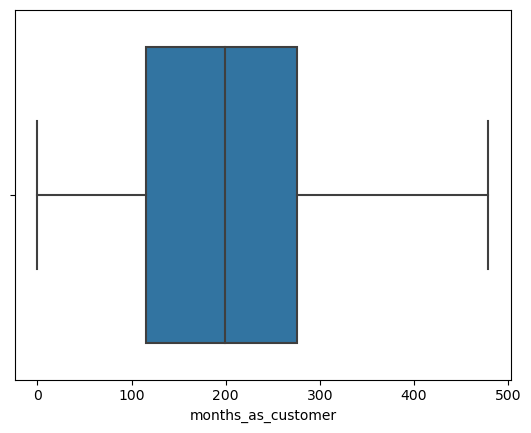

In [171]:

sns.boxplot(num_col['months_as_customer'])
    

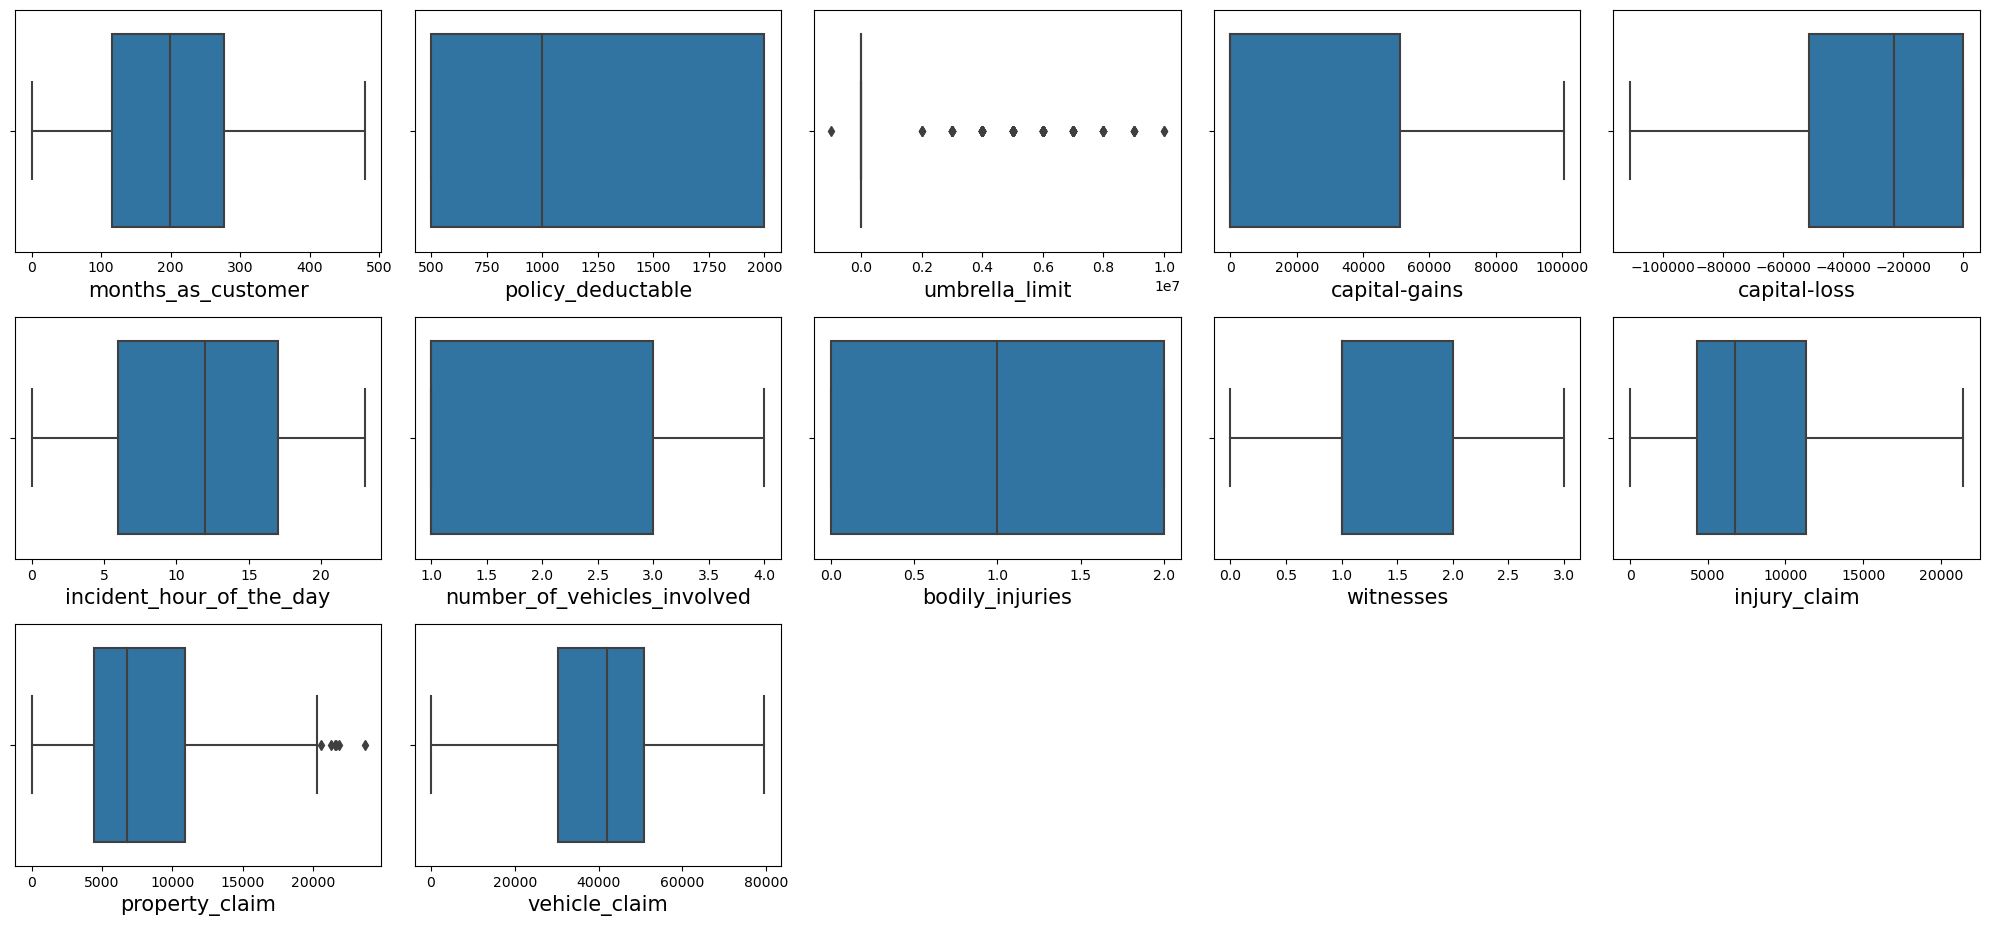

In [174]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in num_col:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(num_col[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some variables we will see later how to overcome it.

## splitting dependent and independent

In [248]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim', 'policy_state_IN',
       'policy_state_OH', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insu

In [254]:
x=df.drop(['fraud_reported_Y'],axis=1)

In [255]:
x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,0,0,1,0,0,0,0,0,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,1,0,0,0,0,0,1,0,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,0,1,0,0,0,0,0,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,0,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,0,0,0,0,0,0,0,0,0


In [256]:
y=df['fraud_reported_Y']

In [257]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported_Y, dtype: uint8

In [140]:
###  Building Logistic regression statsmodel

In [142]:
import statsmodels.api as sm


In [146]:
logit_model=sm.Logit(Y,X)

In [151]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                                    Results: Logit
Model:                        Logit                    Pseudo R-squared:         inf   
Dependent Variable:           fraud_reported_Y         AIC:                      inf   
Date:                         2023-10-12 13:07         BIC:                      inf   
No. Observations:             1000                     Log-Likelihood:           -inf  
Df Model:                     66                       LL-Null:                  0.0000
Df Residuals:                 933                      LLR p-value:              1.0000
Converged:                    1.0000                   Scale:                    1.0000
No. Iterations:               7.0000                                                   
---------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    z

P-value<0.05 we can say that these variables are statistically significant to the target variable.

In [253]:
# Logistic regression before scaling(standardscaler)

In [258]:
## splitting data import train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=9, test_size=0.3)



In [259]:
x_train=pd.DataFrame(x_train)
y_train=pd.DataFrame(y_train)
x_test=pd.DataFrame(x_test)
y_test=pd.DataFrame(y_test)

In [260]:
from sklearn.linear_model import LogisticRegression

clss=LogisticRegression()
clss.fit(x_train, y_train)

LogisticRegression()

In [261]:
y_pred=clss.predict(x_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [262]:
# Model Evalvation 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

acc=accuracy_score(y_test, y_pred)

acc

0.7333333333333333

In [263]:
cm=confusion_matrix(y_test, y_pred)

cm

array([[220,   0],
       [ 80,   0]], dtype=int64)

In [264]:
# Training accuracy for Logistic regression

Logreg_train=accuracy_score(y_train, clss.predict(x_train))
Logreg_test=accuracy_score(y_test, y_pred)

print(f'Training accuracy: {Logreg_train}')
print(f'Test accuracy:{Logreg_test}')

Training accuracy: 0.7614285714285715
Test accuracy:0.7333333333333333


## After scaling the numeric value in the dataset

In [189]:
num_col

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,0,0,0,20,1,0,1,17440,8720,61040
996,285,1000,0,70900,0,23,1,2,3,18080,18080,72320
997,130,500,3000000,35100,0,4,3,2,3,7500,7500,52500
998,458,2000,5000000,0,0,2,1,0,1,5220,5220,36540


In [202]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [203]:
scale=StandardScaler()
scale_data=scale.fit_transform(num_col)

In [204]:
scale_data=pd.DataFrame(data=scale_data, columns=num_col.columns)

In [205]:
scale_data

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,1.078140,-0.222383,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,1.165505,0.749653
1,0.208995,1.412784,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,-1.372696,-1.823346
2,-0.608002,1.412784,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,-0.736072,-0.785565
3,0.452355,1.412784,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,-0.219722,0.677607
4,0.208995,-0.222383,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,-1.399654,-1.768252
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.222383,-0.479476,-0.901927,0.953851,1.202666,-0.823865,-1.210174,-0.438431,2.051155,0.273817,1.224309
996,0.704407,-0.222383,-0.479476,1.643100,0.953851,1.634452,-0.823865,1.229693,1.362107,2.182342,2.214794,1.821868
997,-0.642767,-1.039966,0.826998,0.358023,0.953851,-1.100189,1.140056,1.229693,1.362107,0.013648,0.020826,0.771902
998,2.208028,1.412784,1.697980,-0.901927,0.953851,-1.388046,-0.823865,-1.210174,-0.438431,-0.453708,-0.451976,-0.073580


In [206]:
# again combinning scaled data and categorical data

In [207]:
dat=pd.concat([scale_data, cat_col], axis=1)

In [208]:
dat.shape

(1000, 68)

In [209]:
## split target and independent variable

In [210]:
dat.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim', 'policy_state_IN',
       'policy_state_OH', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insu

In [215]:
X=dat.drop(['fraud_reported_Y'],axis=1)
Y=dat['fraud_reported_Y']

In [225]:
Y=dat['fraud_reported_Y']

In [226]:
Y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported_Y, Length: 1000, dtype: uint8

In [216]:
## splitting data import train test split

In [217]:
from sklearn.model_selection import train_test_split

In [230]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state=8, test_size=0.3)

In [231]:
X_train=pd.DataFrame(X_train)
Y_train=pd.DataFrame(Y_train)
X_test=pd.DataFrame(X_test)
Y_test=pd.DataFrame(Y_test)

In [232]:
Y_train

,fraud_reported_Y
319,1
194,0
441,0
623,1
529,1
...,...
986,1
133,0
361,1
340,1


# Model Building

# Logistic regression

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
cls=LogisticRegression()
cls.fit(X_train, Y_train)

LogisticRegression()

In [235]:
Y_pred=cls.predict(X_test)

In [236]:
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], d

In [237]:
# Model Evalvation 

In [239]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [240]:
acc=accuracy_score(Y_test, Y_pred)

In [241]:
acc

0.7466666666666667

In [242]:
cm=confusion_matrix(Y_test, Y_pred)

In [243]:
cm

array([[194,  26],
       [ 50,  30]], dtype=int64)

In [244]:
# Training accuracy for Logistic regression

In [247]:
Logreg_train=accuracy_score(Y_train, cls.predict(X_train))
Logreg_test=accuracy_score(Y_test, Y_pred)

print(f'Training accuracy: {Logreg_train}')
print(f'Test accuracy:{Logreg_test}')

Training accuracy: 0.8357142857142857
Test accuracy:0.7466666666666667


###  Gridsearch CV for Logistic regression

In [273]:
from sklearn.model_selection import GridSearchCV

In [271]:
cls=LogisticRegression()

In [275]:
param_grid={
    'c':np.logspace(-4,4,20),
    'penality':['L1','L2','none','elasticnet'],
    'solver':['newton-cg','lbfgs','sag','saga','liblinear'],
    'max_iter':[100,500,1000,1500],
}

In [276]:
# Use gridsearchCV to find best hyuperparameter:

In [284]:
grid_search=GridSearchCV(clss, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

In [285]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


ValueError: Invalid parameter c for estimator LogisticRegression(). Check the list of available parameters with `estimator.get_params().keys()`.